In [3]:
import sys
print('Python : {}'.format(sys.version))
import scipy
print('scipy : {}'.format(scipy.__version__))
import numpy
print('numpy : {}'.format(numpy.__version__))
import matplotlib
print('matplotlib : {}'.format(matplotlib.__version__))
import pandas
print('pandas : {}'.format(pandas.__version__))
import sklearn
print('sklearn : {}'.format(sklearn.__version__))

Python : 3.8.3 (default, Jul  2 2020, 11:26:31) 
[Clang 10.0.0 ]
scipy : 1.5.0
numpy : 1.18.5
matplotlib : 3.2.2
pandas : 1.0.5
sklearn : 0.23.1


In [4]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [10]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ["sepal-length","sepal-width","petal-length","class"]
dataset = pandas.read_csv(url, names=names)

In [11]:
print(dataset.shape)

(150, 4)


In [12]:
print(dataset.head(30))

     sepal-length  sepal-width  petal-length        class
5.1           3.5          1.4           0.2  Iris-setosa
4.9           3.0          1.4           0.2  Iris-setosa
4.7           3.2          1.3           0.2  Iris-setosa
4.6           3.1          1.5           0.2  Iris-setosa
5.0           3.6          1.4           0.2  Iris-setosa
5.4           3.9          1.7           0.4  Iris-setosa
4.6           3.4          1.4           0.3  Iris-setosa
5.0           3.4          1.5           0.2  Iris-setosa
4.4           2.9          1.4           0.2  Iris-setosa
4.9           3.1          1.5           0.1  Iris-setosa
5.4           3.7          1.5           0.2  Iris-setosa
4.8           3.4          1.6           0.2  Iris-setosa
4.8           3.0          1.4           0.1  Iris-setosa
4.3           3.0          1.1           0.1  Iris-setosa
5.8           4.0          1.2           0.2  Iris-setosa
5.7           4.4          1.5           0.4  Iris-setosa
5.4           

In [14]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length
count    150.000000   150.000000    150.000000
mean       3.054000     3.758667      1.198667
std        0.433594     1.764420      0.763161
min        2.000000     1.000000      0.100000
25%        2.800000     1.600000      0.300000
50%        3.000000     4.350000      1.300000
75%        3.300000     5.100000      1.800000
max        4.400000     6.900000      2.500000


In [15]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


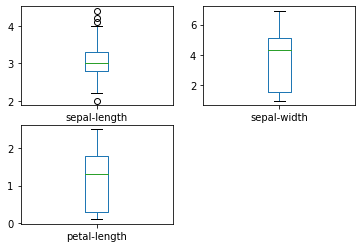

In [20]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

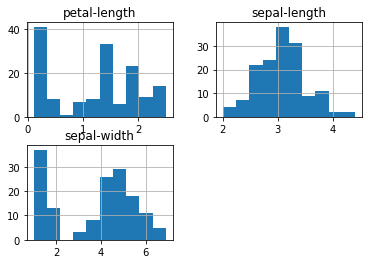

In [21]:
dataset.hist()
plt.show()

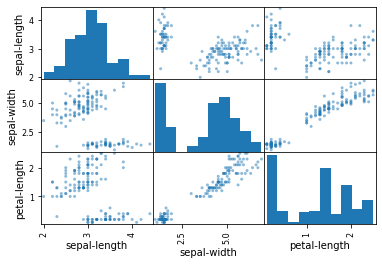

In [22]:
scatter_matrix(dataset)
plt.show()

In [25]:
array=dataset.values
X = array[:,0:3]
Y = array[:,3]
validation_size=0.20
seed=6
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [31]:
seed = 6
scoring = 'accuracy'

In [28]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
#evaluate model in each turn
results=[]
names=[]
for name, model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv_results=model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s : %f (%f) " % (name, cv_results.mean(), cv_results.std())
    print(msg)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


LR : 0.950000 (0.076376) 
LDA : 0.975000 (0.038188) 
KNN : 0.966667 (0.055277) 
CART : 0.966667 (0.040825) 
NB : 0.966667 (0.055277) 
SVM : 0.958333 (0.055902) 


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
